<a href="https://colab.research.google.com/github/Swmar23/WSI-AI/blob/main/lista4/L4Z2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Sprawozdanie z zadania 2 z listy 4 – laboratorium z Wprowadzenia do Sztucznej Inteligencji**

Celem zadania była zastosowanie algorytmu DBSCAN do klasteryzacji danych ze zbioru [The MNIST Database of Handwritten Digits](http://yann.lecun.com/exdb/mnist/).

Ze względu na fakt, że DBSCAN nie radzi sobie z danymi mającymi bardzo dużo wymiarów, konieczne było zastosowanie jednej z metody skutecznej redukcji wymiaru. W przeciwnym wypadku nastąpi tzw. klątwa wielowymiarowości – gęstość maleje wraz ze wzrostem wymiarów w sposób trudny do przeciwdziałania z wykorzystaniem bazowych parametrów DBSCANu.

Z pośród wielu dostępnych metod wybrałem złożenie dwóch metod. Na wstępie dane przetwarzane są przez PCA (Principal Component Analysis). Jest to metoda, która wyszukuje te podpłaszczyzny, które najbardziej rozróżniają analizowany zbiór (są to tzw. główne komponenty). Metoda ta zrobi wstępną redukcję wymiarów do 50, co przyspieszy pracę drugiej metody.

Druga metoda to t-SNE, czyli stochastyczna metoda porządkowania sąsiadów w oparciu o rozkład t (t-Distributed Stochastic Neighbor Embedding). Jest to powszechnie stosowana nieliniowa metoda redukcji wymiarów, która oblicza miarę podobieństwa między parami elementów w przestrzeni o dużych wymiarach i przestrzeni o małych wymiarach, po czym próbuje zoptymalizować te dwie miary podobieństwa.

Dzięki zastosowaniu tych metod redukcji wymiaru dane zostały skutecznie przeniesione na dwuwymiarową przestrzeń w taki sposób, że widoczne są dla większości liczb wydzielone skupiska ich wystepowania.

Następnie dla DBSCAN w przybliżeniu najlepsze okazały się parametry eps = 2.4, MinPts = 7. Dla takich danych otrzymana liczba klastrów wyniosła 18. Około 4% danych zostało zaklasyfikowane jako szum.

Liczba klastrów jest większa niż liczba różnych cyfr. Wynika to z faktu, że część sposobów zapisu tej samej cyfry różni się od siebie na tyle, że trafiają do innego klastra. Prawie wszystkie zapisy cyfr 0, 1, 2, 3, 6, 7, 8. Algorytm miał problem z poprawnym sklasteryzowaniem sporej części zapisów cyfry 5 (trafiały one do klastra z zapisami cyfry 3; cyfry te są zbliżone). Największy problem wystąpił przy rozróżnieniu cyfr 4 i 9 – zdecydowana większość z nich trafiła do wspólnego klastra.

After t-SNE:
Estimated number of clusters: 18
Noise percentage: 4.30%
DB-SCAN results:


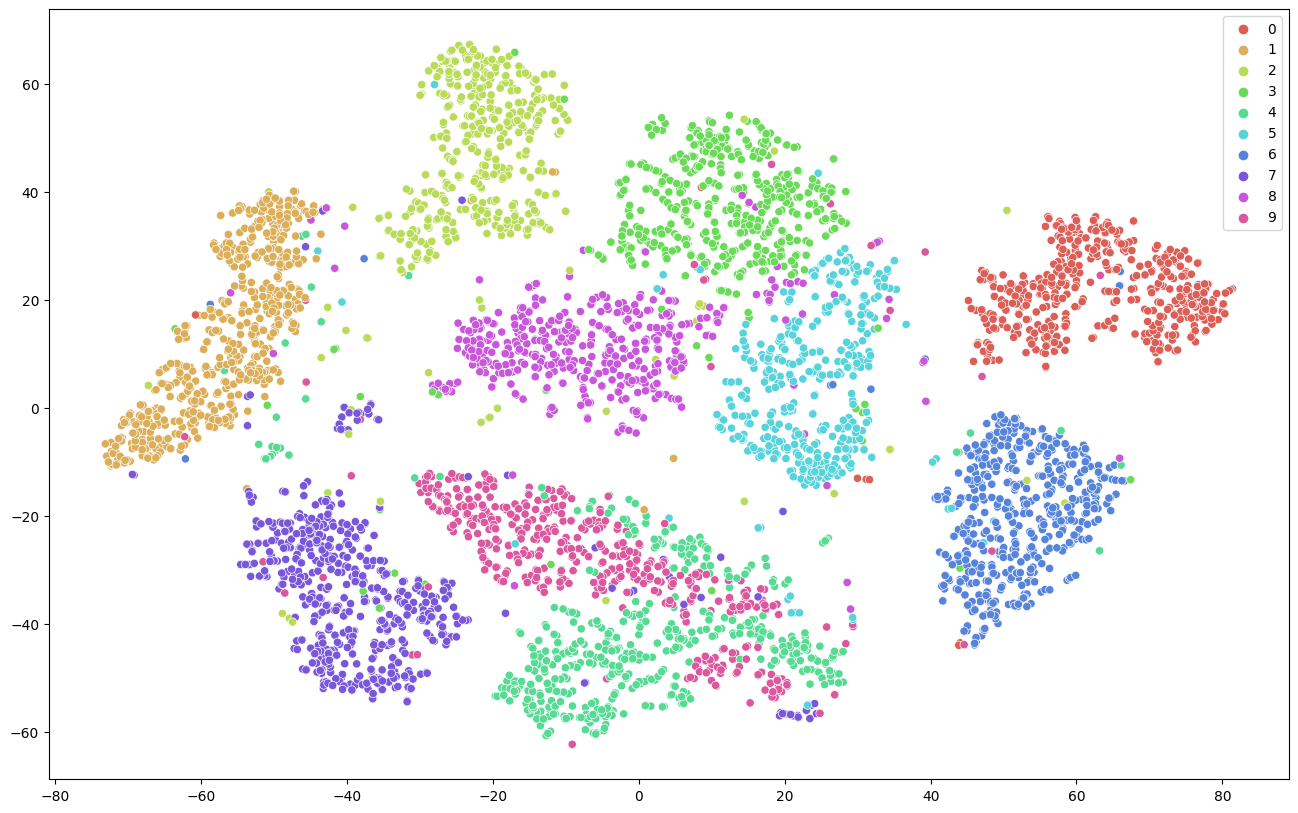

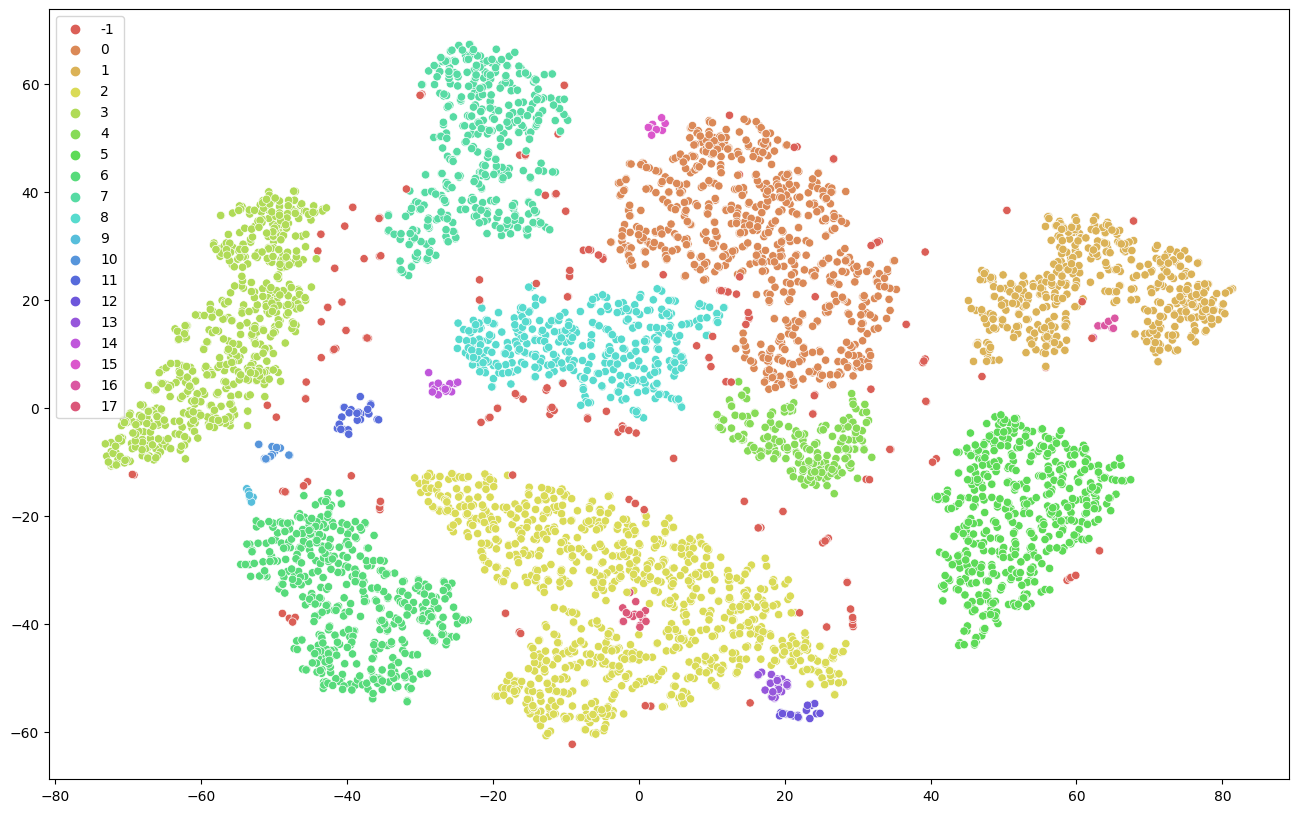

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

mnistDataSet = tf.keras.datasets.mnist

(data_train, labels_train), (data_test, labels_test) = mnistDataSet.load_data()
data_train, data_test = data_train / 255.0, data_test / 255.0
data_train = data_train.reshape((-1, data_train.shape[1]*data_train.shape[2]))
data_test = data_test.reshape((-1, data_test.shape[1]*data_test.shape[2]))

data_train = data_train[:5000]
labels_train = labels_train[:5000]


pca = PCA(n_components=50)
pca_res_50 = pca.fit_transform(data_train)

tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(pca_res_50)

print("After t-SNE:")
plt.figure(figsize=(16,10))
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = labels_train, palette = sns.hls_palette(10), legend = 'full');

db = DBSCAN(eps=2.4, min_samples=7).fit(tsne_res)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print(f'Noise percentage: {(n_noise_/50.0):.2f}%')

print("DB-SCAN results:")
plt.figure(figsize=(16,10))
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = labels, palette = sns.hls_palette(n_clusters_+1), legend = 'full');
